In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical



In [9]:
def load_data(file_path):
    data = pd.read_csv(file_path)  
    return data



In [10]:
def preprocess_data(data):
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values
    X = X.reshape(-1, 28, 28, 1)
    X = X / 255.0
    
    if np.max(y) >= 10:
        print(f"Warning: The maximum label value is {np.max(y)}. Some labels might be outside the expected range.")
    
    y = np.clip(y, 0, 9) 
    y = to_categorical(y, num_classes=10) 
    return X, y


In [11]:
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [12]:
def train_model(model, X_train, y_train, X_val, y_val, epochs=10, batch_size=32):
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size)
    return history



In [13]:
file_path = "/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv"
data = load_data(file_path)
X, y = preprocess_data(data)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
model = create_model()
history = train_model(model, X_train, y_train, X_val, y_val, epochs=10, batch_size=32)
model.save("hand_sign_model.h5")


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9466 - loss: 0.3988 - val_accuracy: 0.9749 - val_loss: 0.1461
Epoch 2/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9723 - loss: 0.1571 - val_accuracy: 0.9763 - val_loss: 0.1090
Epoch 3/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9741 - loss: 0.1065 - val_accuracy: 0.9798 - val_loss: 0.0821
Epoch 4/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9800 - loss: 0.0932 - val_accuracy: 0.9833 - val_loss: 0.0777
Epoch 5/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9786 - loss: 0.0993 - val_accuracy: 0.9798 - val_loss: 0.0688
Epoch 6/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9822 - loss: 0.0661 - val_accuracy: 0.9868 - val_loss: 0.0594
Epoch 7/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9829 - loss: 0.0695 - val_accuracy: 0.9875 - val_loss: 0.0680
Epoch 8/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9847 - loss: 0.0644 - val_accuracy: 0.983

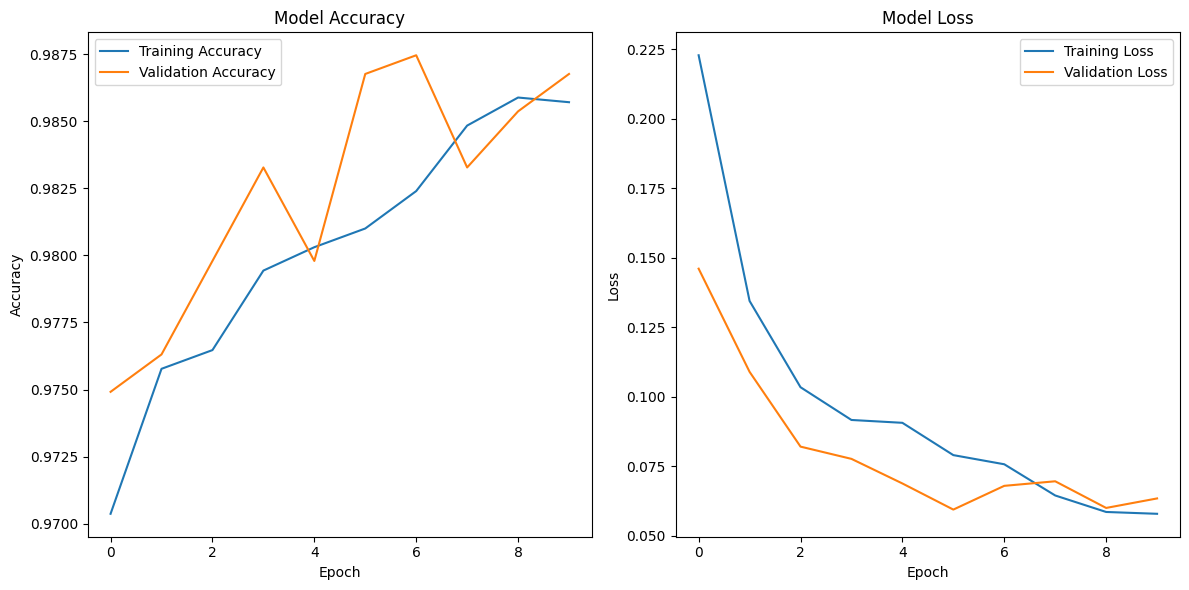

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
